In [1]:
import umap
import numpy as np
import matplotlib.pyplot as plt
import scipy as sci
import scipy.cluster.hierarchy as clust

Make some fake data

In [2]:
n_obs_per_cluster = 100

p1 = [.4, .3, .4, .35, .1, .2, .05, .1]
p2 = [.1, .05, .1, .15, .5, .6, .45, .35]

c1 = np.random.binomial(n = 1, p = p1, size = (n_obs_per_cluster, 8))
c2 = np.random.binomial(n = 1, p = p2, size = (n_obs_per_cluster, 8))

x = np.concatenate((c1, c2), axis = 0)

symptom_names = [f'Symptom {letter}' for letter in 'ABCDEFGH']

In [3]:
distance_matrix = sci.spatial.distance.pdist(X = x.transpose(), metric = 'jaccard')
distance_matrix = sci.spatial.distance.squareform(distance_matrix)

In [4]:
plt.matshow(distance_matrix)

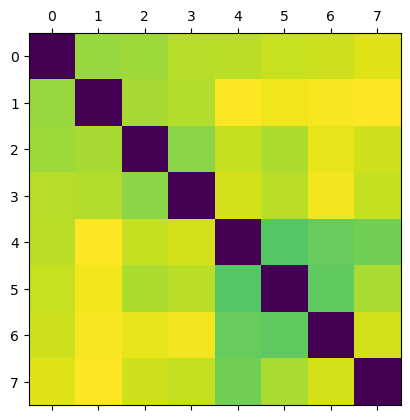

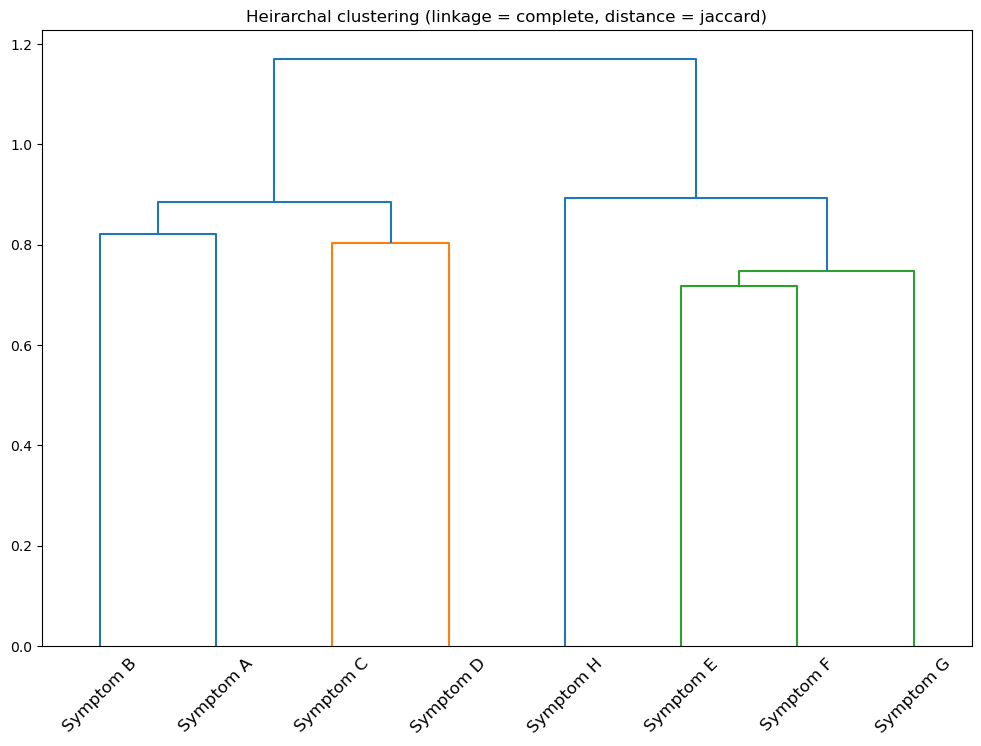

In [5]:
def make_dendrogram(data, method, metric):
    
    distance_matrix = sci.spatial.distance.pdist(X = data, metric = metric)

    linked = clust.linkage(y = distance_matrix,
                       method = 'ward',
                       optimal_ordering = True)

    plt.figure(figsize = (12, 8))
    clust.dendrogram(linked, orientation = 'top', labels = symptom_names)
    plt.xticks(rotation = 45)
    plt.title(f'Heirarchal clustering (linkage = {method}, distance = {metric})')
    plt.show()

make_dendrogram(data = x.transpose(), method = 'complete', metric = 'jaccard')

In [6]:
reducer = umap.UMAP(
    n_neighbors = 3,
    metric = 'euclidean',
    min_dist = 0.1,
    n_components = 2
)

In [7]:
embedding = reducer.fit_transform(distance_matrix)

fig = plt.figure()

ax = fig.add_subplot(111)

ax.scatter(embedding[:,0], embedding[:,1], alpha = 0.5)

ax.set_xlabel(f'X1')
ax.set_ylabel(f'X2')

for i, txt in enumerate(symptom_names):
    ax.annotate(txt, (embedding[:,0][i], embedding[:,1][i]))

## Aligned umap

In [8]:
n_obs_per_cluster = 100

p1 = np.array([.4, .3, .4, .35, .1, .2, .05, .1])
p2 = np.array([.1, .05, .1, .15, .5, .6, .45, .35])

c1 = np.random.binomial(n = 1, p = p1, size = (n_obs_per_cluster, 8))
c2 = np.random.binomial(n = 1, p = p2, size = (n_obs_per_cluster, 8))

x1 = np.concatenate((c1, c2), axis = 0)

symptom_names = [f'Symptom {letter}' for letter in 'ABCDEFGH']

In [9]:
n_obs_per_cluster = 100

p1 = np.array([.4, .3, .4, .35, .1, .2, .05, .1]) + np.array([0, 0, 0, 0, 0.25, .25, 0.25, 0.25])
p2 = np.array([.1, .05, .1, .15, .5, .6, .45, .35])

c1 = np.random.binomial(n = 1, p = p1, size = (n_obs_per_cluster, 8))
c2 = np.random.binomial(n = 1, p = p2, size = (n_obs_per_cluster, 8))

x2 = np.concatenate((c1, c2), axis = 0)

symptom_names = [f'Symptom {letter}' for letter in 'ABCDEFGH']

In [10]:
distance_matrix_x1 = sci.spatial.distance.pdist(X = x1.transpose(), metric = 'jaccard')
distance_matrix_x1 = sci.spatial.distance.squareform(distance_matrix_x1)

distance_matrix_x2 = sci.spatial.distance.pdist(X = x2.transpose(), metric = 'jaccard')
distance_matrix_x2 = sci.spatial.distance.squareform(distance_matrix_x2)

In [11]:
plt.matshow(distance_matrix_x1)
plt.matshow(distance_matrix_x2)

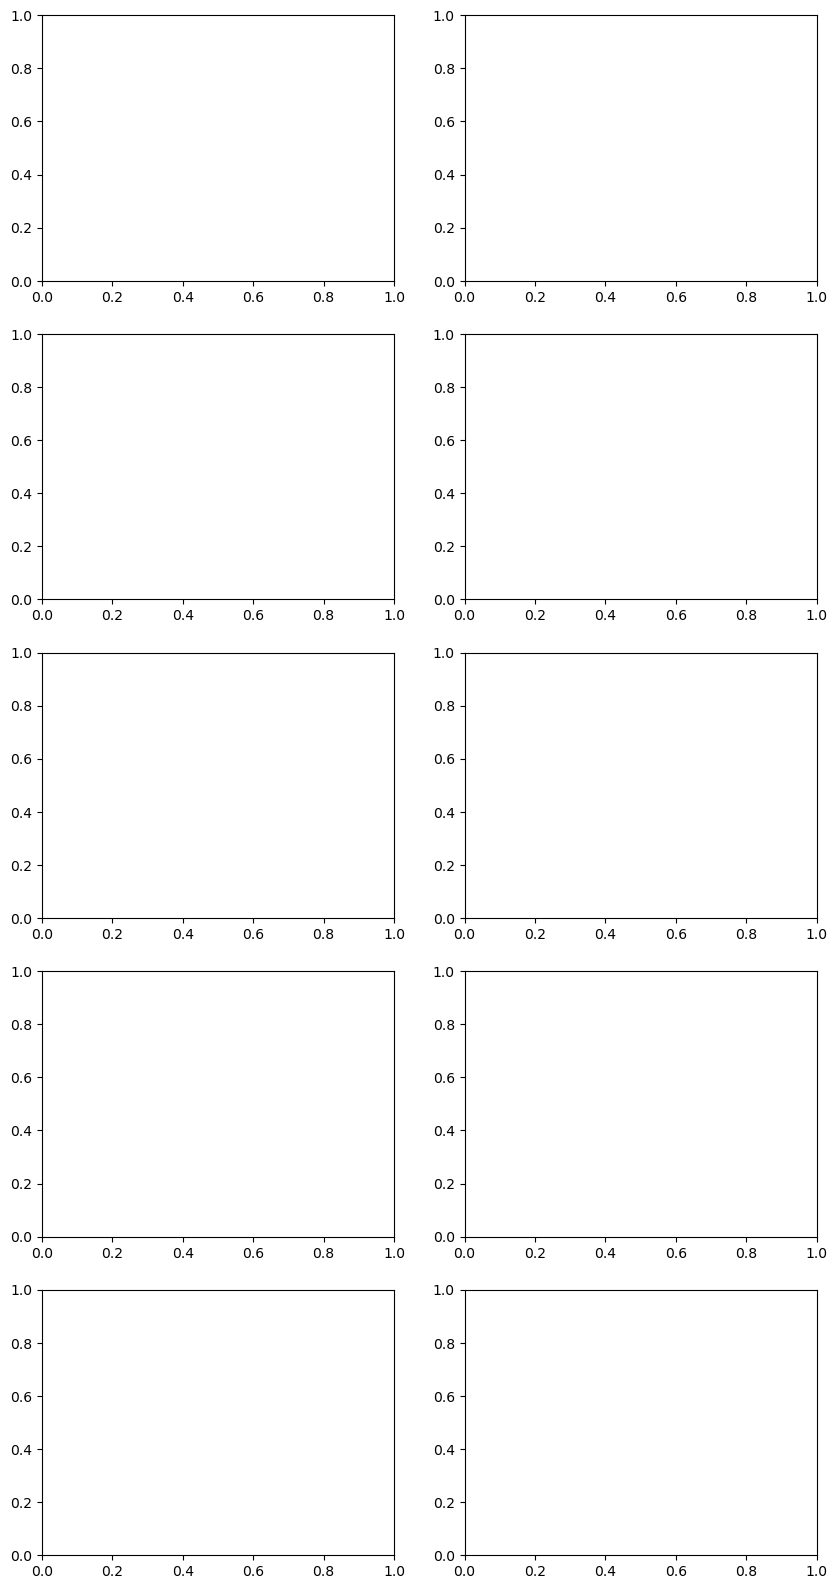

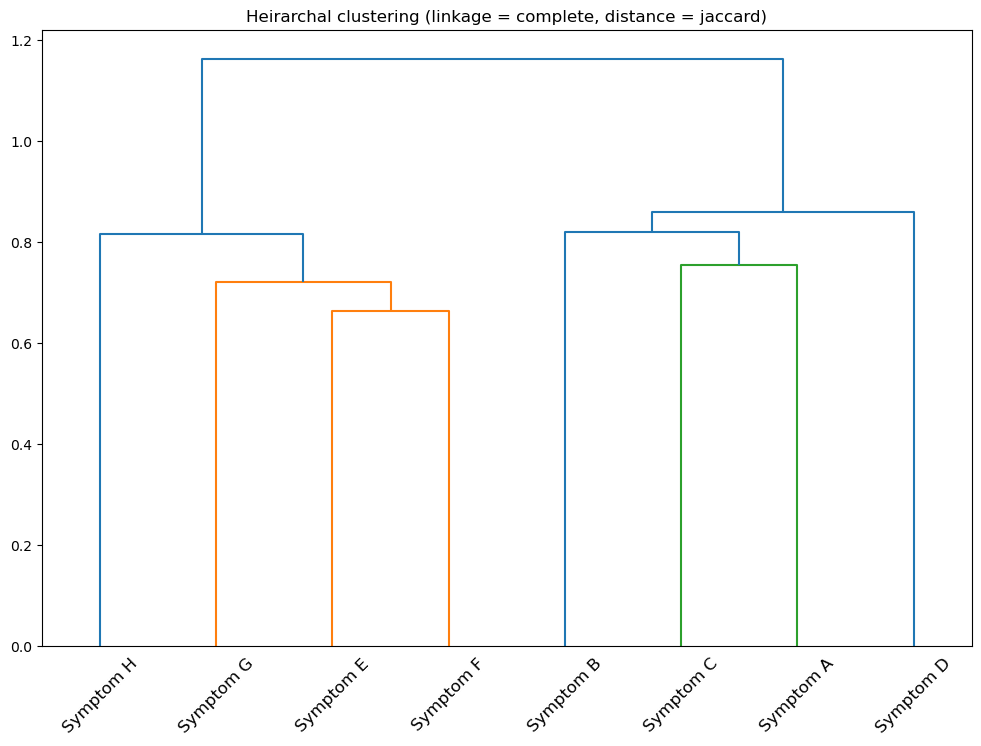

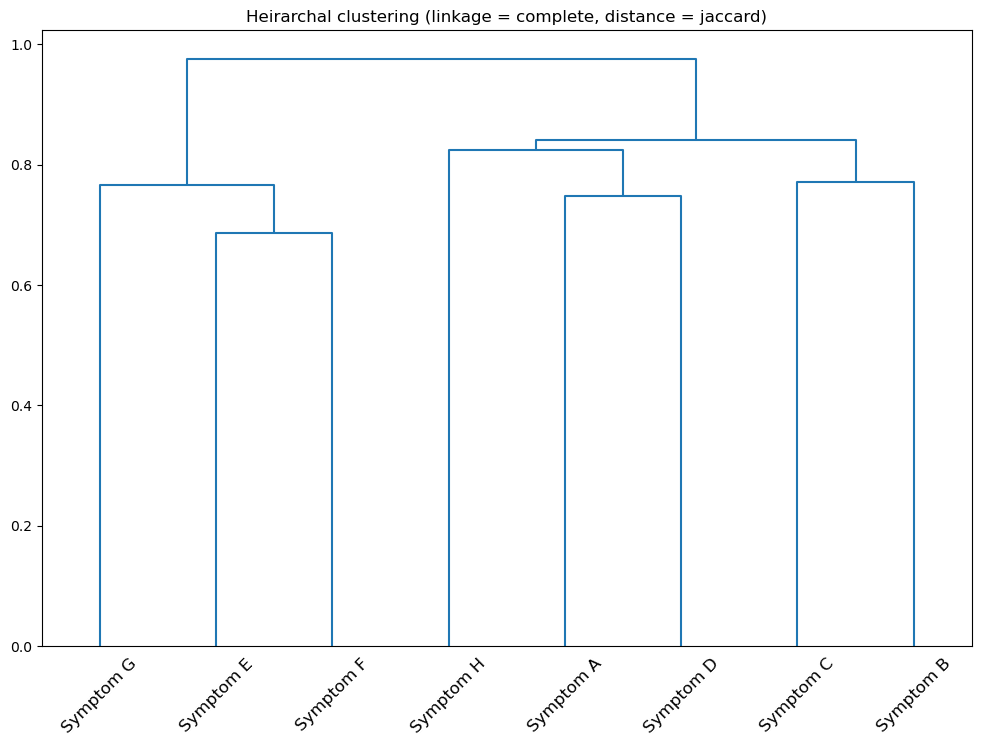

In [17]:
make_dendrogram(data = x1.transpose(), method = 'complete', metric = 'jaccard')
make_dendrogram(data = x2.transpose(), method = 'complete', metric = 'jaccard')

In [13]:
aligned_mapper = umap.AlignedUMAP().fit([distance_matrix_x1, distance_matrix_x2], relations = [{i:i for i in range(8 - 1)}])

C:\Users\mfyles\Anaconda3\envs\aligned-umap\lib\site-packages\umap\umap_.py:2213: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(
C:\Users\mfyles\Anaconda3\envs\aligned-umap\lib\site-packages\umap\umap_.py:2213: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(


In [14]:
aligned_mapper.embeddings_

ListType[array(float32, 2d, C)]([[[-9.464217   3.1126456]
 [-8.526716   3.9882638]
 [-8.545512   3.2508302]
 [-9.303692   3.9166412]
 [-9.345827   2.0617511]
 [-8.506347   1.9809567]
 [-8.58948    1.1926932]
 [-9.285732   1.1666726]], [[-6.521278   2.1950395]
 [-7.084459   2.937449 ]
 [-7.4807343  2.1424015]
 [-6.251527   2.8966908]
 [-8.58511    2.057233 ]
 [-8.406447   2.8117092]
 [-8.326608   1.4582785]
 [-7.7022142  3.644113 ]], ...])

In [15]:
def axis_bounds(embedding):
    left, right = embedding.T[0].min(), embedding.T[0].max()
    bottom, top = embedding.T[1].min(), embedding.T[1].max()
    adj_h, adj_v = (right - left) * 0.1, (top - bottom) * 0.1
    return [left - adj_h, right + adj_h, bottom - adj_v, top + adj_v]

In [16]:
fig, axs = plt.subplots(5,2, figsize=(10, 20))
ax_bound = axis_bounds(np.vstack(aligned_mapper.embeddings_))
for i, ax in enumerate(axs.flatten()):
    current_target = ordered_target[150 * i:min(ordered_target.shape[0], 150 * i + 400)]
    ax.scatter(*aligned_mapper.embeddings_[i].T, s=2, c=current_target, cmap="Spectral")
    ax.axis(ax_bound)
    ax.set(xticks=[], yticks=[])
plt.tight_layout()

NameError: name 'ordered_target' is not defined